In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist
from fnal_column_analysis_tools.hist import plot

In [2]:
with gzip.open("hists_quantile_qcd_finern2_withmsd.pkl.gz") as fin:
    hists = pickle.load(fin)

In [3]:
with gzip.open("hists_quantile_hbb_finern2_withmsd.pkl.gz") as fin2:
    hists2 = pickle.load(fin2)

In [11]:
print(hists)
print(hists2)

{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_msd,AK8Puppijet0_pt,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f076fc029b0>}
{'hjetpt': <Hist (dataset,AK8Puppijet0_isHadronicV,AK8Puppijet0_msd,AK8Puppijet0_pt,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f076fbe3630>}


In [4]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)
    hists2[key] = hists2[key].group(process, process_cats, process_map)

/home/sangeon/.local/lib/python3.5/site-packages/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [5]:
x = hists['hjetpt']
x2 = hists2['hjetpt']

In [6]:
print(x.axis("AK8Puppijet0_msd").identifiers(overflow='allnan'))
print(x2)

[<Interval ((-inf, 40)) instance at 0x7f36ed829b38>, <Interval ([40, 47)) instance at 0x7f36ed829b70>, <Interval ([47, 54)) instance at 0x7f36ed829ba8>, <Interval ([54, 61)) instance at 0x7f36ed829be0>, <Interval ([61, 68)) instance at 0x7f36ed829c18>, <Interval ([68, 75)) instance at 0x7f36ed829c50>, <Interval ([75, 82)) instance at 0x7f36ed829c88>, <Interval ([82, 89)) instance at 0x7f36ed829cc0>, <Interval ([89, 96)) instance at 0x7f36ed829cf8>, <Interval ([96, 103)) instance at 0x7f36ed829d30>, <Interval ([103, 110)) instance at 0x7f36ed829d68>, <Interval ([110, 117)) instance at 0x7f36ed829da0>, <Interval ([117, 124)) instance at 0x7f36ed829dd8>, <Interval ([124, 131)) instance at 0x7f36ed829e10>, <Interval ([131, 138)) instance at 0x7f36ed829e48>, <Interval ([138, 145)) instance at 0x7f36ed829e80>, <Interval ([145, 152)) instance at 0x7f36ed829eb8>, <Interval ([152, 159)) instance at 0x7f36ed829ef0>, <Interval ([159, 166)) instance at 0x7f36ed829f28>, <Interval ([166, 173)) insta

In [7]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='over')
y2 = x2.project("AK8Puppijet0_pt", slice(450,None), overflow='over')

In [8]:
print(y)
print(y2)

<Hist (process,AK8Puppijet0_msd,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f36ed848fd0>
<Hist (process,AK8Puppijet0_msd,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f37204b9f60>


In [9]:
z = y.project("AK8Puppijet0_msd", slice(40,159), overflow='over')
z2 = y2.project("AK8Puppijet0_msd", slice(40,159), overflow='over')

#z = y.sum("AK8Puppijet0_msd")
#z2 = y2.sum("AK8Puppijet0_msd")

In [10]:
print(z)
print(z2)

<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f36ed848da0>
<Hist (process,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f36ed848c50>


In [11]:
print(z2.values())

{('Hbb',): array([[4.0047747e-04, 6.9416093e-04, 8.2765345e-04, ..., 3.8224235e-01,
        2.4968433e-01, 6.2794864e-02],
       [7.2085945e-04, 1.3883217e-03, 1.3082263e-03, ..., 3.2219753e-01,
        1.7020291e-01, 2.8247014e-02],
       [5.6066841e-04, 1.0679399e-03, 1.1480354e-03, ..., 2.5996327e-01,
        1.2788580e-01, 1.8074879e-02],
       ...,
       [1.0679398e-03, 1.4684172e-03, 1.3082263e-03, ..., 2.5630554e-03,
        3.7377898e-04, 0.0000000e+00],
       [8.8105042e-04, 1.0412413e-03, 1.2014324e-03, ..., 1.8688947e-03,
        4.5387441e-04, 0.0000000e+00],
       [8.2765345e-04, 1.3616233e-03, 1.2014324e-03, ..., 8.5435197e-04,
        2.6698498e-04, 0.0000000e+00]], dtype=float32)}


In [12]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [13]:
t = z.project("process").values(overflow='allnan')
t2 = z2.project("process").values(overflow='allnan')

In [14]:
background = multidim_cumsum(t[()])
signal = multidim_cumsum(t2[()])

In [15]:
sqrtbkg = np.sqrt(background)

In [16]:
print(sqrtbkg)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2176520e+02 1.2176520e+02 1.1084739e+02 ... 3.4036069e+00
  0.0000000e+00 0.0000000e+00]
 [1.7327612e+02 1.7327612e+02 1.5523000e+02 ... 4.2318983e+00
  3.0997226e-01 3.0997226e-01]
 ...
 [9.0133636e+02 9.0133636e+02 6.9965741e+02 ... 9.0403519e+00
  4.6627340e+00 4.6627340e+00]
 [9.0152112e+02 9.0152112e+02 6.9977521e+02 ... 9.0403519e+00
  4.6627340e+00 4.6627340e+00]
 [9.0152112e+02 9.0152112e+02 6.9977521e+02 ... 9.0403519e+00
  4.6627340e+00 4.6627340e+00]]


In [17]:
soverb = signal/(sqrtbkg+1)
print(soverb)
norm_soverb = soverb/np.amax(soverb)
print(norm_soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2715178e-02 1.2715178e-02 1.3952769e-02 ... 1.4259870e-02
  0.0000000e+00 0.0000000e+00]
 [1.6844267e-02 1.6844267e-02 1.8782772e-02 ... 1.7401310e-02
  0.0000000e+00 0.0000000e+00]
 ...
 [2.1387236e-02 2.1387236e-02 2.7482761e-02 ... 1.8935587e-02
  5.1862487e-05 5.1862487e-05]
 [2.1383539e-02 2.1383539e-02 2.7478980e-02 ... 1.8935587e-02
  5.1862487e-05 5.1862487e-05]
 [2.1383539e-02 2.1383539e-02 2.7478980e-02 ... 1.8935587e-02
  5.1862487e-05 5.1862487e-05]]
[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.10018221 0.10018221 0.10993314 ... 0.11235277 0.         0.        ]
 [0.13271509 0.13271509 0.14798847 ... 0.137104   0.         0.        ]
 ...
 [0.16850892 0.16850892 0.21653523 ... 0.1491925  0.00040862 0.00040862]
 [0.16847979 0.16847979 0.21650544 ... 0.1491925  0.00040862 0.00040862]
 [0.16847979 0.16847979 0.21650544 ... 0.1491925  0.00040862 0.000

<IPython.core.display.Javascript object>


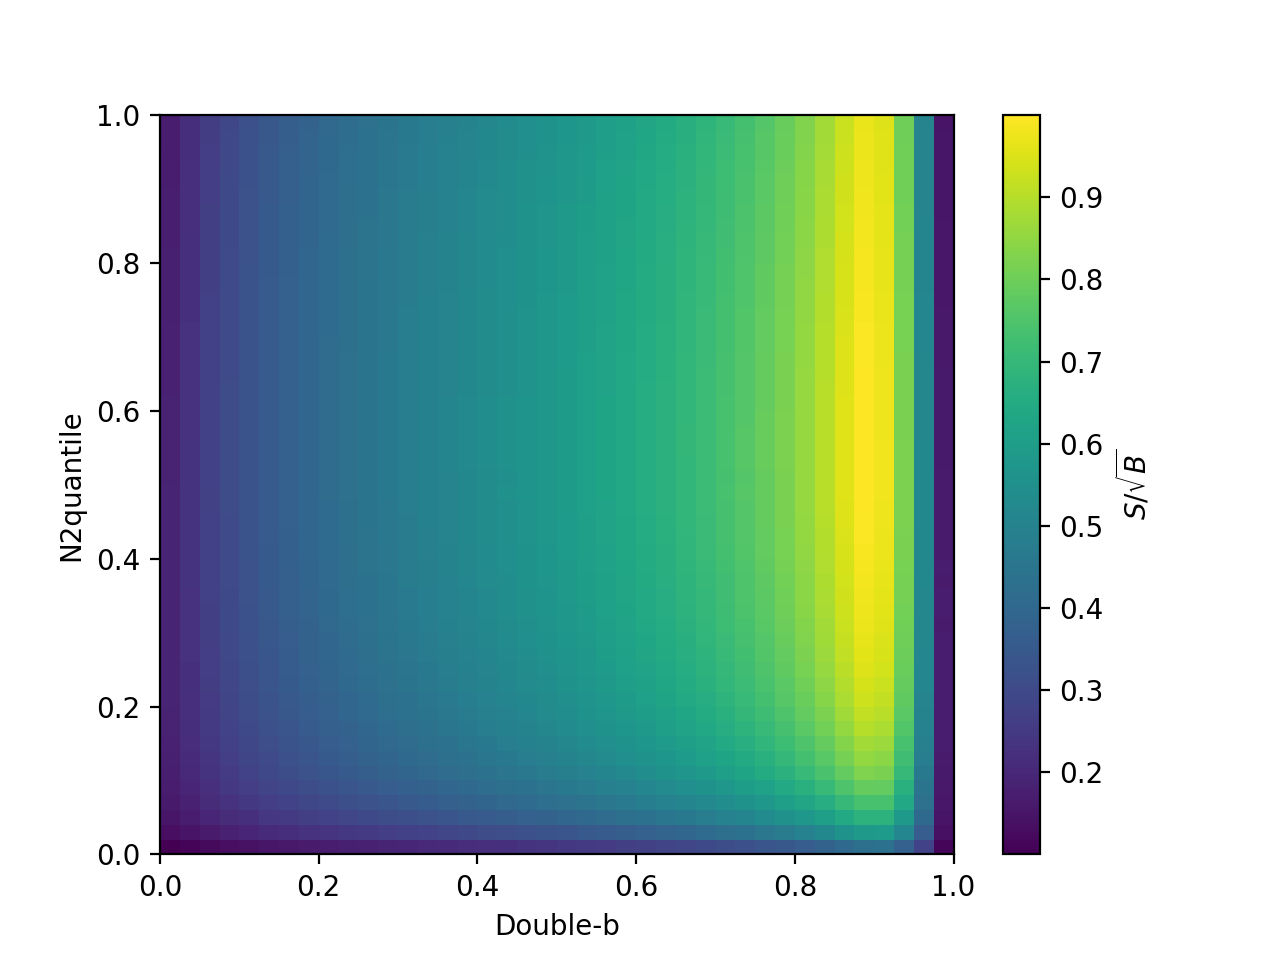

In [28]:
htemp = z2.project("process")
htemp.clear()
htemp.label = '$S/\sqrt{B}$'
#htemp.label = 'Entries'
htemp._sumw = {():norm_soverb}
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", patch_opts={})



In [29]:
fig.savefig("plots/Optimization_quantile_doubleb_withfinern2_msdcut_noctr.pdf")
fig.savefig("plots/Optimization_quantile_doubleb_withfinern2_msdcut_noctr.png")



In [26]:
a = htemp.values()[()]
quantiles = np.quantile(a, [0.5,0.85,0.98])
xx, yy = np.meshgrid(*tuple(ax.centers() for ax in htemp.axes()))
cc = ax.contour(yy, xx, a.T, quantiles, colors='w')
ax.clabel(cc, inline=1, fontsize=10)

<a list of 3 text.Text objects>

In [27]:
cclabels = ax.clabel(cc, inline=1, fontsize=10, fmt='%.2f')

import matplotlib.patheffects as patheffects
plt.setp(cc.collections, path_effects=[patheffects.withStroke(linewidth=3, foreground='k')])
plt.setp(cclabels, path_effects=[patheffects.withStroke(linewidth=1.5, foreground='k')])

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [ ]:
tuples = tuples[::-1]

In [ ]:
print(tuples)

<IPython.core.display.Javascript object>


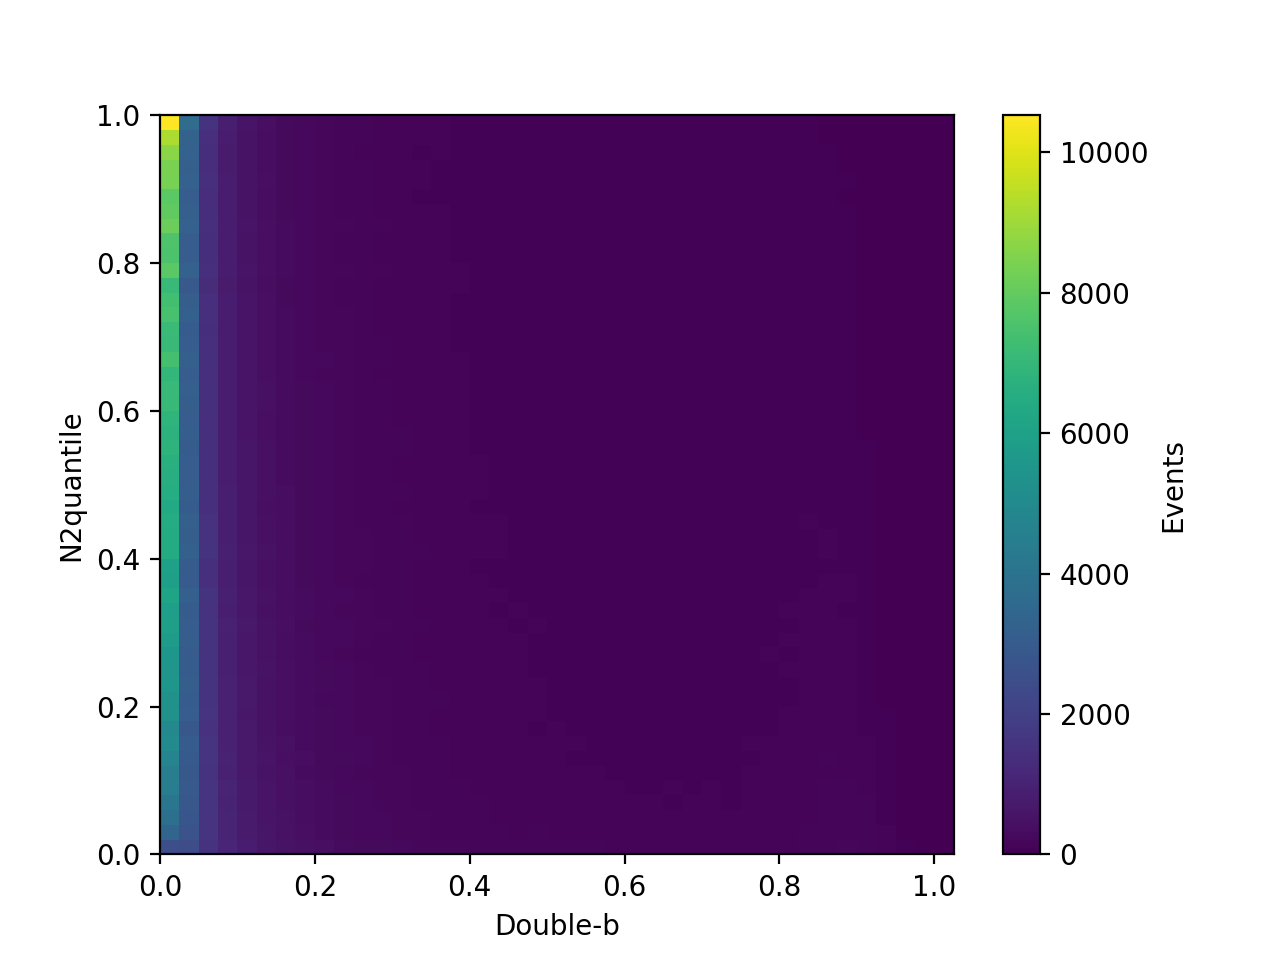

In [34]:
htemp2 = z.project("process")
fig2, ax2, _ = plot.plot2d(htemp2, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [ ]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [ ]:
print(a)

In [ ]:
b = multidim_cumsum(a)

In [ ]:
print(b)

In [ ]:
tt = z.project("process").values(overflow='allnan')


In [ ]:
print(tt)

In [ ]:
print(hists)

In [ ]:
print(y)

In [33]:
fig2, ax, _ = plot.plot2d(y2.sum("jetrho").sum("process"), xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

KeyError: 'No axis jetrho found in <Hist (process,AK8Puppijet0_msd,N2quantile,AK8Puppijet0_deepdoubleb) instance at 0x7f076fc02a58>'

In [ ]:
fig2.savefig("plots/HBB_quantiledoubleb.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig3, ax, _ = plot.plot1d(y2.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig3.savefig("plots/QCD_quantile.pdf")


In [ ]:
fig4, ax, _ = plot.plot2d(y.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig4.savefig("plots/QCD_N2_jetrho.pdf")


In [ ]:
fig5, ax, _ = plot.plot2d(x.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
fig5.savefig("plots/QCD_N2_jetpt.pdf")


In [ ]:
fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 0.8}

fig6, ax, _ = plot.plot1d(y.sum("jetrho").sum("process").sum("AK8Puppijet0_deepdoubleb"), stack=True, fill_opts=fill_opts)


In [ ]:
fig7, ax, _ = plot.plot2d(y2.sum("AK8Puppijet0_deepdoubleb").sum("process"), xaxis="jetrho", xoverflow='over', patch_opts={})

In [ ]:
fig5, ax, _ = plot.plot2d(x2.sum("AK8Puppijet0_deepdoubleb").sum("process").sum("jetrho"), xaxis="AK8Puppijet0_pt", xoverflow='over', patch_opts={})

In [ ]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [ ]:
print(a)

In [ ]:
multidim_cumsum(a)